#📌 Extracción

In [2]:
# importamos la biblioteca pandas
import pandas as pd

In [3]:
# importamos los datos
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

# leemos el archivo JSON
df_telecom = pd.read_json(url)
df_telecom


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [4]:
# debemos normalizar el DataFrame: customer, phone, internet, account
customer = pd.json_normalize(df_telecom['customer'])
phone = pd.json_normalize(df_telecom['phone'])
internet = pd.json_normalize(df_telecom['internet'])
account = pd.json_normalize(df_telecom['account'])

In [5]:
# eliminamos las columnas anidadas del DataFrame original
df_telecom = df_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1)

In [6]:
#concatenamos los dataframes ya normalizados y almacenamos en un nuevo DF
df_telecom = pd.concat([df_telecom,customer,phone,internet,account], axis = 1)
df_telecom


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [7]:
# conociendo el conjunto de datos
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


###**Comprobación de incoherencias en los datos**

In [8]:
# importamos la biblioteca NumPy
import numpy as np


In [9]:
# verificar si hay valores nulos
df_telecom.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [10]:
# verificando si hay duplicados
df_telecom.duplicated().sum()

np.int64(0)

In [11]:
# revisamos las columnas
df_telecom.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [12]:
# estandarización en minusculas las columnas
df_telecom.columns = df_telecom.columns.str.lower()
df_telecom.columns

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'charges.monthly',
       'charges.total'],
      dtype='object')

In [13]:
# estandarizando en minusculas los string de las filas
df_telecom[['churn', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod']].applymap(lambda x: x.lower())

<ipython-input-13-f604b77e0fd7>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  'paperlessbilling', 'paymentmethod']].applymap(lambda x: x.lower())


,churn,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod
0,no,female,yes,yes,yes,no,dsl,no,yes,no,yes,yes,no,one year,yes,mailed check
1,no,male,no,no,yes,yes,dsl,no,no,no,no,no,yes,month-to-month,no,mailed check
2,yes,male,no,no,yes,no,fiber optic,no,no,yes,no,no,no,month-to-month,yes,electronic check
3,yes,male,yes,no,yes,no,fiber optic,no,yes,yes,no,yes,yes,month-to-month,yes,electronic check
4,yes,female,yes,no,yes,no,fiber optic,no,no,no,yes,yes,no,month-to-month,yes,mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,no,female,no,no,yes,no,dsl,yes,no,no,yes,no,no,one year,no,mailed check
7263,yes,male,yes,no,yes,yes,fiber optic,no,no,no,no,no,yes,month-to-month,yes,electronic check
7264,no,male,no,no,yes,no,dsl,no,yes,no,no,no,no,month-to-month,yes,mailed check
7265,no,male,yes,yes,yes,no,dsl,yes,no,yes,yes,no,yes,two year,no,mailed check


Arriba nos advierten que el metodo applymap está obsoleto y que pronto dejará de funcionar. Por lo que es mejor usar la forma más actualizada:

In [14]:
# estandarizando en minusculas los string de las filas
# creamos una lista con columnas
columnas = (['churn', 'gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod'])

# hacemos un bucle o lazo for para realizar el cambio a minusculas
for col in columnas:
  df_telecom[col] = df_telecom[col].str.lower()
df_telecom.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.4


In [15]:
# Verificando inconsistencias en categorías
# hacemos un lazo for para recorrer los datos
for col in df_telecom.columns:
  valores_unicos = df_telecom[col].unique()
  print(f"Columna '{col}': {valores_unicos}")

Columna 'customerid': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'churn': ['no' 'yes' '']
Columna 'gender': ['female' 'male']
Columna 'seniorcitizen': [0 1]
Columna 'partner': ['yes' 'no']
Columna 'dependents': ['yes' 'no']
Columna 'tenure': [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
Columna 'phoneservice': ['yes' 'no']
Columna 'multiplelines': ['no' 'yes' 'no phone service']
Columna 'internetservice': ['dsl' 'fiber optic' 'no']
Columna 'onlinesecurity': ['no' 'yes' 'no internet service']
Columna 'onlinebackup': ['yes' 'no' 'no internet service']
Columna 'deviceprotection': ['no' 'yes' 'no internet service']
Columna 'techsupport': ['yes' 'no' 'no internet service']
Columna 'streamingtv': ['yes' 'no' 'no internet service']
Columna 'streamingmovies': ['no' 'yes

In [16]:
# la columna multiplelines tiene 'no phone service' , debemos normalizar y colocar simplemente no
df_telecom['multiplelines'] = df_telecom['multiplelines'].replace('no phone service', 'no')
df_telecom['multiplelines'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
# algunas columnas tiene 'no internet service' debemos normalizar y colocar simplemente no
# creamos una lista con las columnas afectadas

columnas_reemplazar = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'techsupport',
                       'streamingtv', 'streamingmovies']

# hacemos un lazo for para recorrer y reemplazar por no
for col in columnas_reemplazar:
  df_telecom[col] = df_telecom[col].replace('no internet service', 'no')

# mostrar el cambio para asegurarnos:
for col in columnas_reemplazar:
  print(f"Columna '{col}': {df_telecom[col].unique()}")


Columna 'onlinesecurity': ['no' 'yes']
Columna 'onlinebackup': ['yes' 'no']
Columna 'deviceprotection': ['no' 'yes']
Columna 'techsupport': ['yes' 'no']
Columna 'techsupport': ['yes' 'no']
Columna 'streamingtv': ['yes' 'no']
Columna 'streamingmovies': ['no' 'yes']


In [18]:
# charges.total debe ser float, pero está como object (string) verificamos que no tenga espacios vacios como chur
(df_telecom['charges.total'] == ' ').sum()

np.int64(11)

In [19]:
(df_telecom['charges.total'] == '').sum()

np.int64(0)

In [20]:
# En la columna churn hay valores vacios y en charge.total por lo que debemos tratarlos, lo convertiremos a NaN (valores nulos)
df_telecom['churn'] = df_telecom['churn'].replace('', np.nan)
df_telecom['churn'].unique()

array(['no', 'yes', nan], dtype=object)

In [21]:
# Columna charge.total
df_telecom['charges.total'] = df_telecom['charges.total'].replace(' ', np.nan)
df_telecom['charges.total'].isnull().sum()

np.int64(11)

In [22]:
# verificar cuantos valores nulos hay en la columna churn
df_telecom['churn'].isnull().sum()

np.int64(224)

In [23]:
# en este caso, eliminamos los registros que tengan nan ya que no representan una cantidad significativa
df_telecom.dropna(subset=['churn'], axis=0, inplace=True)
df_telecom.dropna(subset=['charges.total'], axis=0, inplace=True)

In [24]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

### Transformando algunos tipos de datos:

 puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos

In [25]:
# hay que transformar en flotante la columna charges.total
df_telecom['charges.total'] = df_telecom['charges.total'].astype(np.float64)

In [26]:
# transfoormando a booleano la columnas seniorcitizen (mayor a 65 años)
df_telecom['seniorcitizen'] = df_telecom['seniorcitizen'].astype(bool)

In [27]:
# transformar valores 'yes' y 'no' en binarios
columnas_booleanas = ['churn', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
                  'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                  'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']

df_telecom[columnas_booleanas] = df_telecom[columnas_booleanas].replace({'yes': True, 'no': False})
df_telecom[columnas_booleanas] = df_telecom[columnas_booleanas].astype(bool)
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   bool   
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   bool   
 4   partner           7032 non-null   bool   
 5   dependents        7032 non-null   bool   
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   bool   
 8   multiplelines     7032 non-null   bool   
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   bool   
 11  onlinebackup      7032 non-null   bool   
 12  deviceprotection  7032 non-null   bool   
 13  techsupport       7032 non-null   bool   
 14  streamingtv       7032 non-null   bool   
 15  streamingmovies   7032 non-null   bool   
 16  contract          7032 non-null   object 
 17  

<ipython-input-27-3cddefd92161>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom[columnas_booleanas] = df_telecom[columnas_booleanas].replace({'yes': True, 'no': False})


In [28]:
#podemos cambiar a español los nombres de la columna para comodidad
df_telecom = df_telecom.rename(columns={
    'customerid':'id', 'churn':'cancelacion', 'gender':'genero', 'seniorcitizen':'mayor_65', 'partner':'pareja',
   'dependents':'dependientes', 'tenure':'meses_contrato', 'phoneservice':'servicio_telefonico', 'multiplelines':'multiples_lineas',
    'internetservice':'proveedor_internet', 'onlinesecurity':'seguridad_online', 'onlinebackup':'respaldo_online', 'deviceprotection':'proteccion_dispositivo',
    'techsupport':'soporte_tecnico', 'streamingtv':'tv_cable', 'streamingmovies':'peliculas_streaming', 'contract':'tipo_contrato',
    'paperlessbilling':'factura_online', 'paymentmethod':'forma_pago', 'charges.monthly':'cargo_mensual',
    'charges.total':'cargo_total'
})

In [29]:
# transformo la columna cancelacion mejor a int para que salga en describe()
df_telecom['cancelacion'] = df_telecom['cancelacion'].astype(np.int64)

### Columna de cuentas diarias

In [30]:
df_telecom['cuentas_diarias'] = df_telecom['cargo_mensual'].astype(np.float64) / 30
df_telecom.tail()

,id,cancelacion,genero,mayor_65,pareja,dependientes,meses_contrato,servicio_telefonico,multiples_lineas,proveedor_internet,...,proteccion_dispositivo,soporte_tecnico,tv_cable,peliculas_streaming,tipo_contrato,factura_online,forma_pago,cargo_mensual,cargo_total,cuentas_diarias
7262,9987-LUTYD,0,female,False,False,False,13,True,False,dsl,...,False,True,False,False,one year,False,mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,male,False,True,False,22,True,True,fiber optic,...,False,False,False,True,month-to-month,True,electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,male,False,False,False,2,True,False,dsl,...,False,False,False,False,month-to-month,True,mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,male,False,True,True,67,True,False,dsl,...,True,True,False,True,two year,False,mailed check,67.85,4627.65,2.261667
7266,9995-HOTOH,0,male,False,True,True,63,False,False,dsl,...,True,False,True,True,two year,False,electronic check,59.00,3707.60,1.966667


#📊 Carga y análisis

In [31]:
df_telecom.describe()

,cancelacion,meses_contrato,cargo_mensual,cargo_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,32.421786,64.798208,2283.300441,2.159940
std,0.441782,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,1.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [32]:
# para ver con describe las columnas cadenas y boolenas
df_telecom.describe(include=['O', 'bool'])

,id,genero,mayor_65,pareja,dependientes,servicio_telefonico,multiples_lineas,proveedor_internet,seguridad_online,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_cable,peliculas_streaming,tipo_contrato,factura_online,forma_pago
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4
top,9995-HOTOH,male,False,False,False,True,False,fiber optic,False,False,False,False,False,False,month-to-month,True,electronic check
freq,1,3549,5890,3639,4933,6352,4065,3096,5017,4607,4614,4992,4329,4301,3875,4168,2365


In [33]:
df_telecom['cancelacion'] = df_telecom['cancelacion'].replace({'yes': True, 'no': False})
df_telecom['cancelacion'] = df_telecom['cancelacion'].astype(bool)

In [34]:
df_telecom['cancelacion']

,cancelacion
0,False
1,False
2,True
3,True
4,True
...,...
7262,False
7263,True
7264,False
7265,False


### **Distribución de evasión**

In [35]:
# importamos matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-36-54e0e2a4b0c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_telecom, x='cancelacion', palette='viridis')


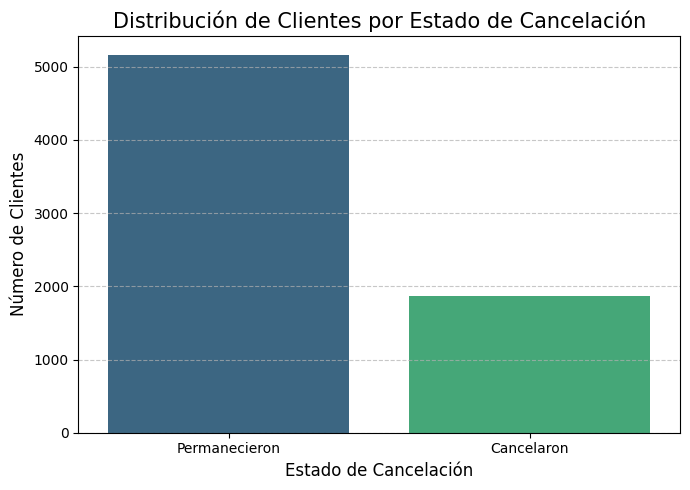

In [36]:
# graficos de barras
plt.figure(figsize=(7, 5)) # Ajusta el tamaño de la figura
sns.countplot(data=df_telecom, x='cancelacion', palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Clientes por Estado de Cancelación', fontsize=15)
plt.xlabel('Estado de Cancelación', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Hacer las etiquetas del eje X más descriptivas
plt.xticks(ticks=[0, 1], labels=['Permanecieron', 'Cancelaron'], fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7) # Añade una cuadrícula horizontal suave
plt.tight_layout() # Asegura que todos los elementos se ajusten bien

# Mostrar el gráfico
plt.show()

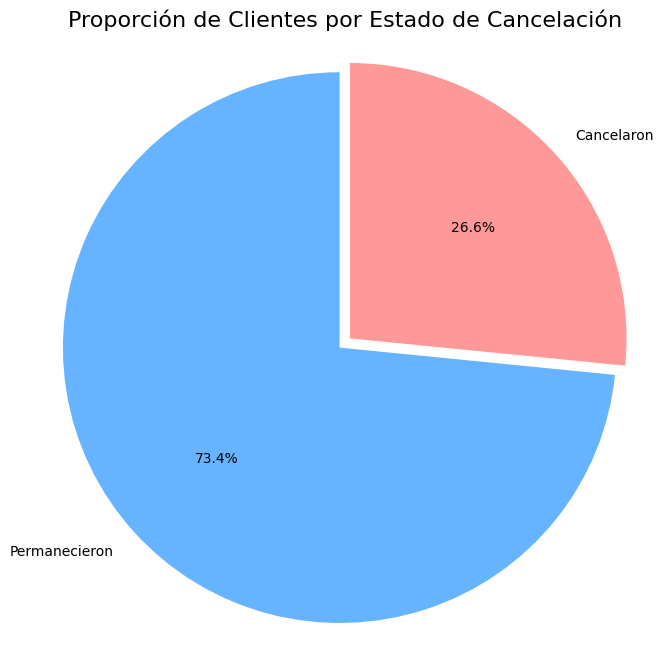

In [37]:
proporciones_cancelacion = df_telecom['cancelacion'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 8)) # Ajusta el tamaño de la figura para que el pastel sea grande y legible

# Creamos el gráfico de pastel
plt.pie(
    proporciones_cancelacion,
    labels=['Permanecieron', 'Cancelaron'], # Etiquetas para cada porción
    autopct='%1.1f%%', # Formato para mostrar los porcentajes dentro de las porciones (1 decimal)
    colors=['#66b3ff', '#ff9999'], # Colores personalizados para las porciones
    startangle=90, # Hace que la primera porción empiece en la parte superior
    explode=(0, 0.05) # Separa ligeramente la porción de (cancelaron) para destacarla
)

plt.title('Proporción de Clientes por Estado de Cancelación', fontsize=16)
plt.axis('equal') # Asegura que el gráfico de pastel sea un círculo perfecto

plt.show() # Muestra el gráfico

### **Recuento de evasión por variables categóricas**

In [38]:
# Filtrar solo los clientes que cancelaron
cancelaron = df_telecom[df_telecom['cancelacion'] == True]
print(f'Total de clientes que cancelaron: {len(cancelaron)}')

Total de clientes que cancelaron: 1869


In [39]:
# Hombres y Mujeres entre los que Cancelaron
print('Proporción de Género entre Clientes que Cancelaron')
genero_cancelaron = cancelaron['genero'].value_counts(normalize=True) * 100
print(genero_cancelaron )

Proporción de Género entre Clientes que Cancelaron
genero
female    50.24077
male      49.75923
Name: proportion, dtype: float64


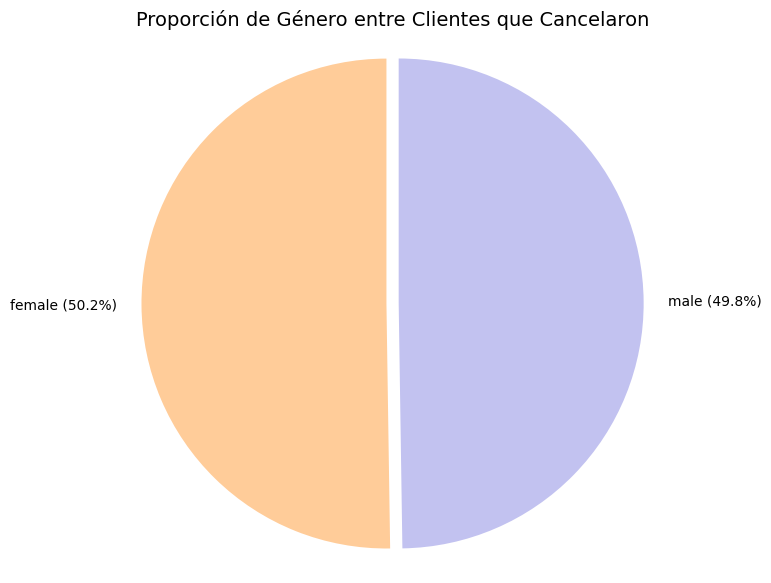

In [40]:
plt.figure(figsize=(7, 7))
plt.pie(genero_cancelaron,
    labels=[f'{label} ({value:.1f}%)' for label, value in genero_cancelaron.items()], # Etiquetas con porcentaje
    colors=['#ffcc99', '#c2c2f0'], # Colores suaves
    autopct='', # Quitamos el autopct para que las etiquetas lo incluyan
    startangle=90,
    explode=(0.05, 0) # Pequeña separación para el primer segmento
)
plt.title('Proporción de Género entre Clientes que Cancelaron', fontsize=14)
plt.axis('equal') # Asegura que sea un círculo
plt.show()

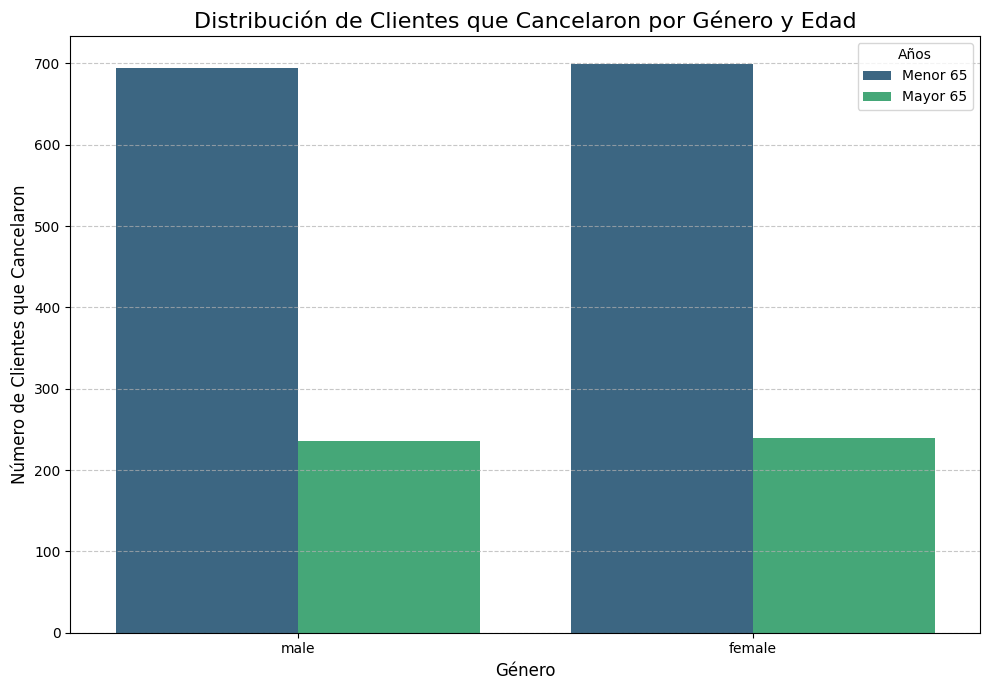

In [41]:
# Crear el gráfico de barras agrupado
plt.figure(figsize=(10, 7))

sns.countplot(data=cancelaron, x='genero', hue='mayor_65', palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Clientes que Cancelaron por Género y Edad', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes que Cancelaron', fontsize=12)

# Personalizar las etiquetas de la leyenda para que sean más claras
plt.legend(title='Años', labels=['Menor 65', 'Mayor 65'])

plt.grid(axis='y', linestyle='--', alpha=0.7) # Cuadrícula en el eje Y
plt.tight_layout() # Ajusta el diseño para que todo se vea bien
plt.show()

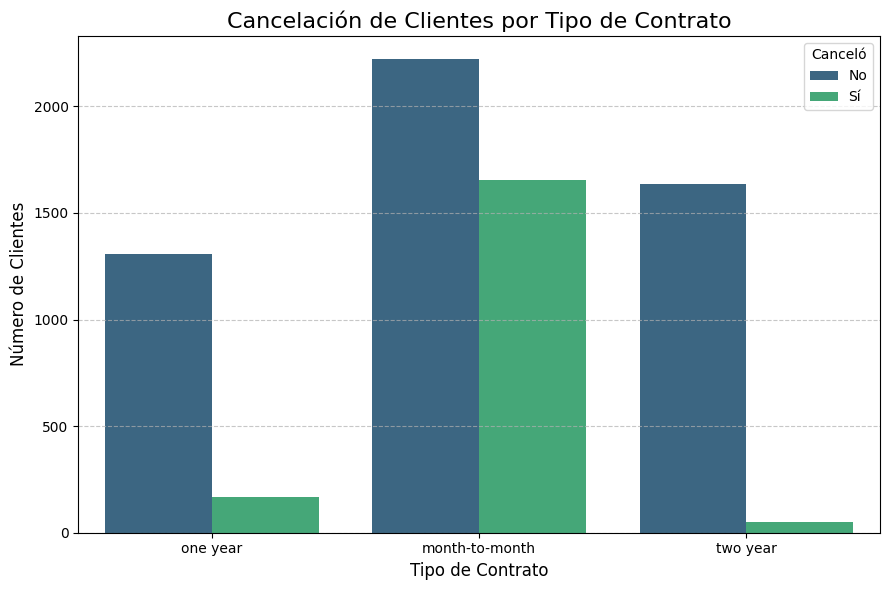

In [42]:
# Cancelación por Tipo de Contrato ---
plt.figure(figsize=(9, 6)) # Ajusta el tamaño para este gráfico

# Usamos sns.countplot
# x='tipo_contrato' para las categorías principales en el eje X
# hue='cancelacion' para agrupar las barras por si el cliente canceló o no
sns.countplot(data=df_telecom, x='tipo_contrato', hue='cancelacion', palette='viridis')

plt.title('Cancelación de Clientes por Tipo de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Personalizar etiquetas de la leyenda para mayor claridad
plt.legend(title='Canceló', labels=['No', 'Sí'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

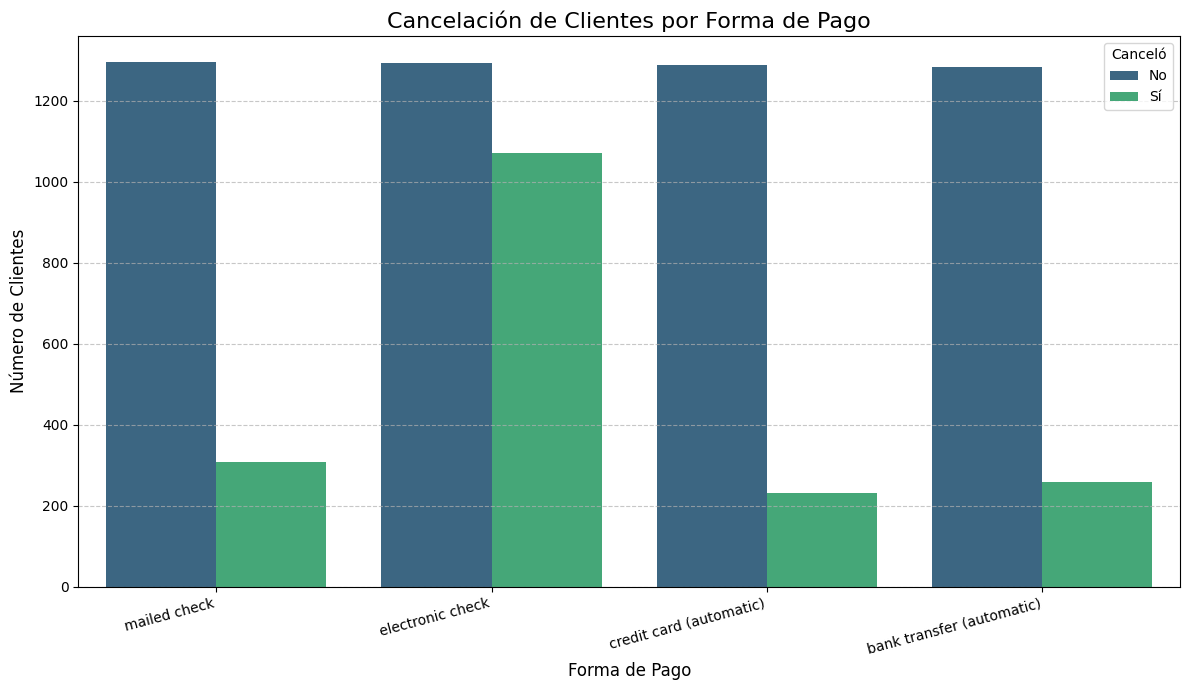

In [43]:
# Cancelación por Forma de Pago
plt.figure(figsize=(12, 7)) # Un tamaño un poco más grande debido a más categorías de pago

# Usamos sns.countplot
# x='forma_pago' para las categorías principales en el eje X
# hue='cancelacion' para agrupar las barras por si el cliente canceló o no
sns.countplot(data=df_telecom, x='forma_pago', hue='cancelacion', palette='viridis')

plt.title('Cancelación de Clientes por Forma de Pago', fontsize=16)
plt.xlabel('Forma de Pago', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Rotar las etiquetas del eje X si son muy largas y se superponen
plt.xticks(rotation=15, ha='right')

# Personalizar etiquetas de la leyenda
plt.legend(title='Canceló', labels=['No', 'Sí'])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [44]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   cancelacion             7032 non-null   bool   
 2   genero                  7032 non-null   object 
 3   mayor_65                7032 non-null   bool   
 4   pareja                  7032 non-null   bool   
 5   dependientes            7032 non-null   bool   
 6   meses_contrato          7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   bool   
 8   multiples_lineas        7032 non-null   bool   
 9   proveedor_internet      7032 non-null   object 
 10  seguridad_online        7032 non-null   bool   
 11  respaldo_online         7032 non-null   bool   
 12  proteccion_dispositivo  7032 non-null   bool   
 13  soporte_tecnico         7032 non-null   bool   
 14  tv_cable                7032 non-null   bool 

### **Conteo de evasión por variables numéricas**

<ipython-input-45-5b8391154e26>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom, x='cancelacion', y='cargo_total', palette='viridis')


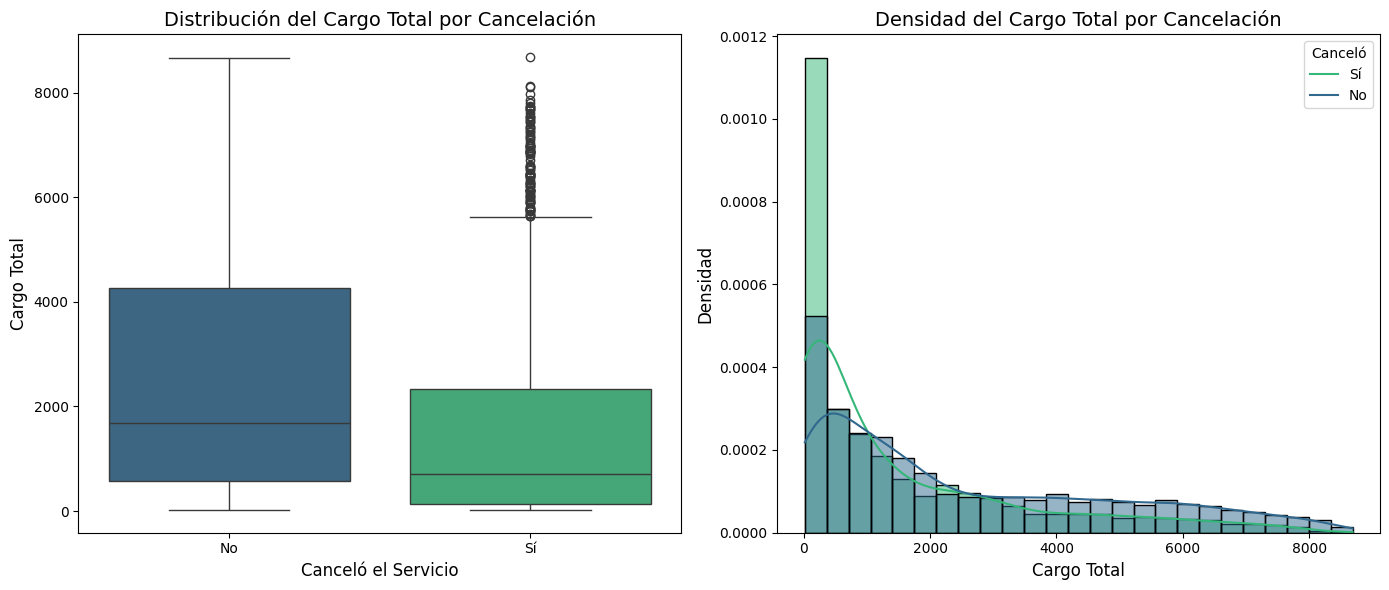


--- Estadísticas Descriptivas para 'cargo_total' agrupadas por 'cancelacion' ---
              count         mean          std    min      25%      50%  \
cancelacion                                                              
False        5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
True         1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                  75%      max  
cancelacion                     
False        4264.125  8672.45  
True         2331.300  8684.80  


In [45]:
# Análisis para 'cargo_total' ---
plt.figure(figsize=(14, 6))

# Subplot 1: Box Plot de 'cargo_total' vs 'cancelacion'
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.boxplot(data=df_telecom, x='cancelacion', y='cargo_total', palette='viridis')
plt.title('Distribución del Cargo Total por Cancelación', fontsize=14)
plt.xlabel('Canceló el Servicio', fontsize=12)
plt.ylabel('Cargo Total', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])


# Subplot 2: Histograma/KDE Plot de 'cargo_total' por 'cancelacion'
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.histplot(data=df_telecom, x='cargo_total', hue='cancelacion', kde=True, palette='viridis', stat='density', common_norm=False)
plt.title('Densidad del Cargo Total por Cancelación', fontsize=14)
plt.xlabel('Cargo Total', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Canceló', labels=['Sí', 'No']) # Ajusta el orden de la leyenda para que coincida con hue
plt.tight_layout()
plt.show()

print("\n--- Estadísticas Descriptivas para 'cargo_total' agrupadas por 'cancelacion' ---")
print(df_telecom.groupby('cancelacion')['cargo_total'].describe())

<ipython-input-46-abea6de25d38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom, x='cancelacion', y='cuentas_diarias', palette='viridis')


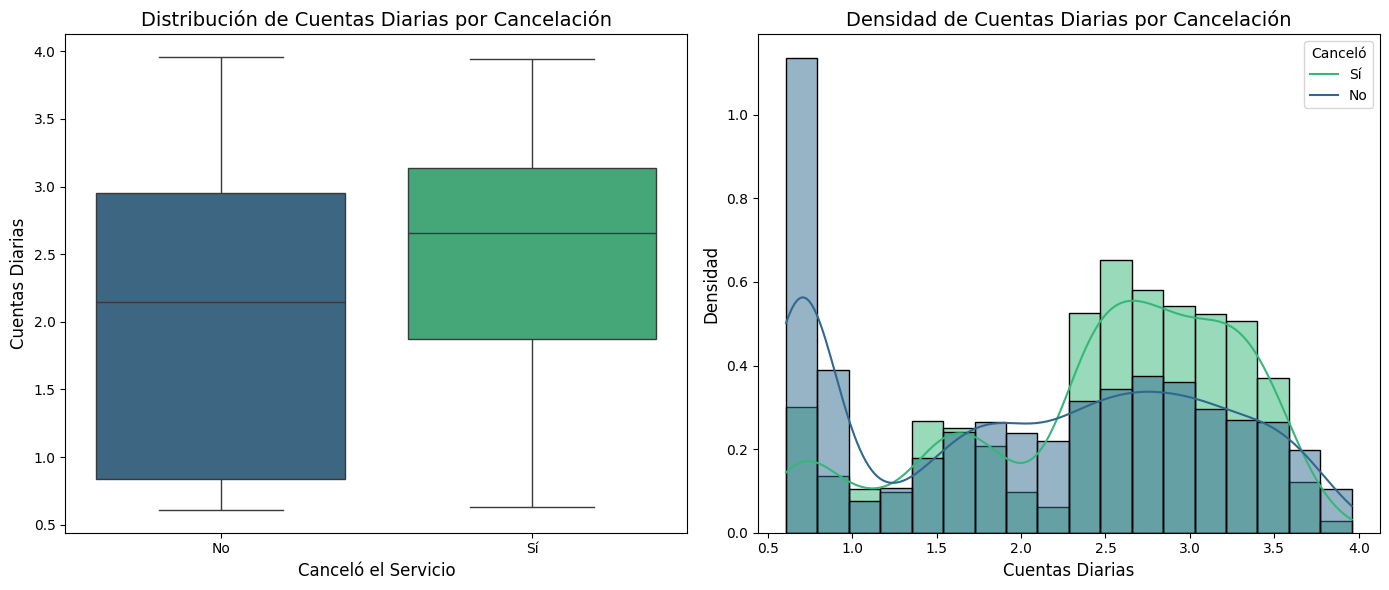


--- Estadísticas Descriptivas para 'cuentas_diarias' agrupadas por 'cancelacion' ---
              count      mean       std       min       25%       50%  \
cancelacion                                                             
False        5163.0  2.043580  1.036485  0.608333  0.836667  2.148333   
True         1869.0  2.481378  0.822202  0.628333  1.871667  2.655000   

                  75%       max  
cancelacion                      
False        2.949167  3.958333  
True         3.140000  3.945000  


In [46]:
# Análisis para 'cuentas_diarias' ---
plt.figure(figsize=(14, 6))

# Subplot 1: Box Plot de 'cuentas_diarias' vs 'cancelacion'
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, primer gráfico
sns.boxplot(data=df_telecom, x='cancelacion', y='cuentas_diarias', palette='viridis')
plt.title('Distribución de Cuentas Diarias por Cancelación', fontsize=14)
plt.xlabel('Canceló el Servicio', fontsize=12)
plt.ylabel('Cuentas Diarias', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])


# Subplot 2: Histograma/KDE Plot de 'cuentas_diarias' por 'cancelacion'
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, segundo gráfico
sns.histplot(data=df_telecom, x='cuentas_diarias', hue='cancelacion', kde=True, palette='viridis', stat='density', common_norm=False)
plt.title('Densidad de Cuentas Diarias por Cancelación', fontsize=14)
plt.xlabel('Cuentas Diarias', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.legend(title='Canceló', labels=['Sí', 'No']) # Ajusta el orden de la leyenda para que coincida con hue
plt.tight_layout()
plt.show()

print("\n--- Estadísticas Descriptivas para 'cuentas_diarias' agrupadas por 'cancelacion' ---")
print(df_telecom.groupby('cancelacion')['cuentas_diarias'].describe())

#📄Informe final

###🔹 **Introducción**

El presente informe tiene como objetivo principal analizar el fenómeno de la evasión de clientes (Churn) en la industria de las telecomunicaciones. La evasión de clientes, es decir, cuando los suscriptores deciden cancelar su servicio, representa un desafío significativo para las empresas, impactando directamente en sus ingresos y crecimiento a largo plazo. Comprender los factores que influyen en la decisión de un cliente de darse de baja es crucial para desarrollar estrategias de retención efectivas y mitigar este impacto negativo. Este análisis explorará los datos de clientes para identificar patrones y proporcionar insights accionables que permitan reducir la tasa de evasión.


### 🔹 Limpieza y Tratamiento de Datos

La calidad de los datos es fundamental para un análisis robusto. El proceso de limpieza y preprocesamiento de nuestro DataFrame df_telecom incluyó los siguientes pasos clave:

1.    **Importación y Normalización**: Los datos fueron importados desde una fuente JSON, y las columnas anidadas (como customer, phone, internet, account) fueron normalizadas y concatenadas al DataFrame principal para crear una estructura tabular plana.

2.    **Manejo de Valores Ausentes**:
        Se identificaron y convirtieron las cadenas vacías (' ') en la columna 'TotalCharges' a valores nulos (NaN) para asegurar que la columna fuera tratada como numérica.
        Se identificaron y convirtieron las cadenas vacías ('') en la columna 'cancelacion' (anteriormente 'churn') a valores nulos (NaN).
        Se eliminaron las filas con valores NaN en la columna 'cancelacion', ya que no representaban una cantidad significativa y eran cruciales para la variable objetivo.

3.    **Manejo de Duplicados**: Se verificó la existencia de filas duplicadas en el DataFrame. Se encontró que no había registros completamente duplicados, lo cual es un buen indicio de la integridad de los datos.

4.    **Estandarización de Categorías**:
        Se transformaron los valores 'no internet service' y 'no phone service' en varias columnas relacionadas con servicios (como 'onlinesecurity', 'streamingtv', 'multiplelines', etc.) a un valor estandarizado 'No'. Esto asegura consistencia en las categorías 'Sí'/'No'.

5.    **Conversión de Tipos de Datos**:
        La columna 'seniorcitizen' (originalmente 0/1) fue convertida a tipo booleano (True/False) para una representación más intuitiva.
        Las columnas categóricas binarias (como 'churn', 'partner', 'dependents', etc.) que contenían 'yes' y 'no' fueron transformadas a valores booleanos (True/False) utilizando el método replace() de Pandas. Este proceso garantiza que estas variables puedan ser tratadas como lógicas en análisis posteriores.
        Las columnas numéricas como 'cargo_total' y 'cuentas_diarias' fueron confirmadas como tipos numéricos apropiados.

### 🔹 **Análisis Exploratorio de Datos (EDA)**

El EDA nos permitió entender las características de los datos y la distribución de la variable de evasión.
Distribución General de la Evasión (cancelacion)

Se observó la proporción de clientes que cancelaron el servicio versus los que permanecieron. Unos 1.800 clientes abandonaron el servicio, representando el 26% del total de los clientes

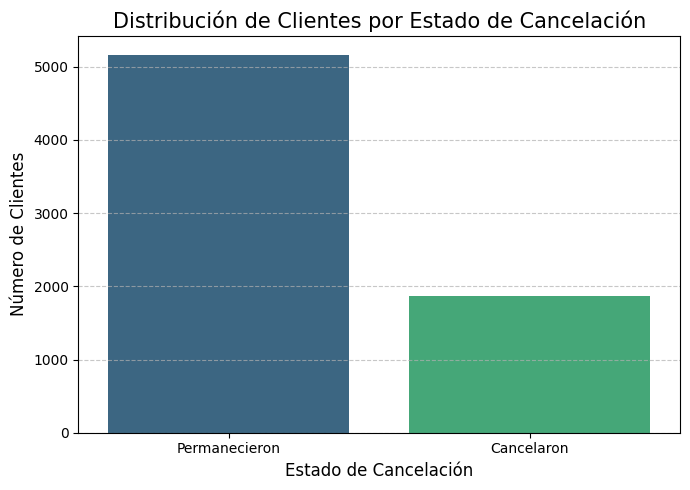



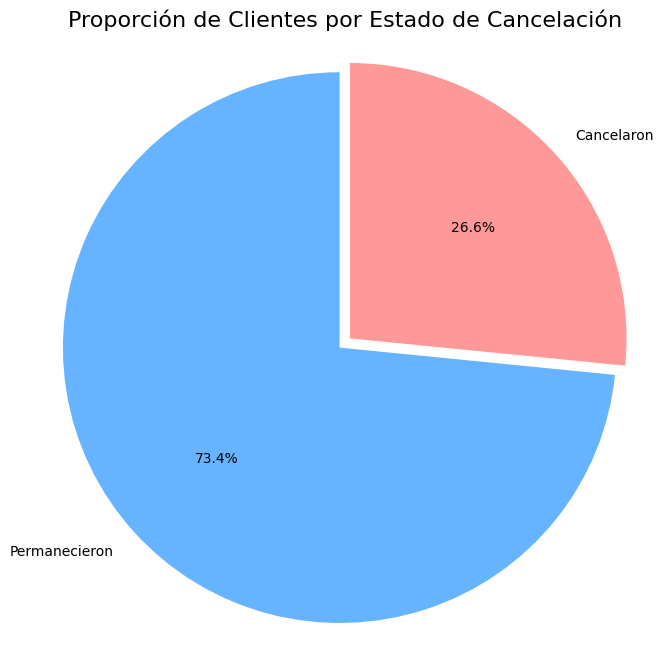

#### **Evasión por Características Demográficas (Género y Edad)**

Se analizó la evasión de clientes segmentada por género y si eran mayores de 65 años o no.

Proporción de Género entre Clientes que Cancelaron
genero

**Femeninas**:     50.24%

**Masculinos**:      49.75%

No hay una diferencia notable o significativa entre generos que cancelaron

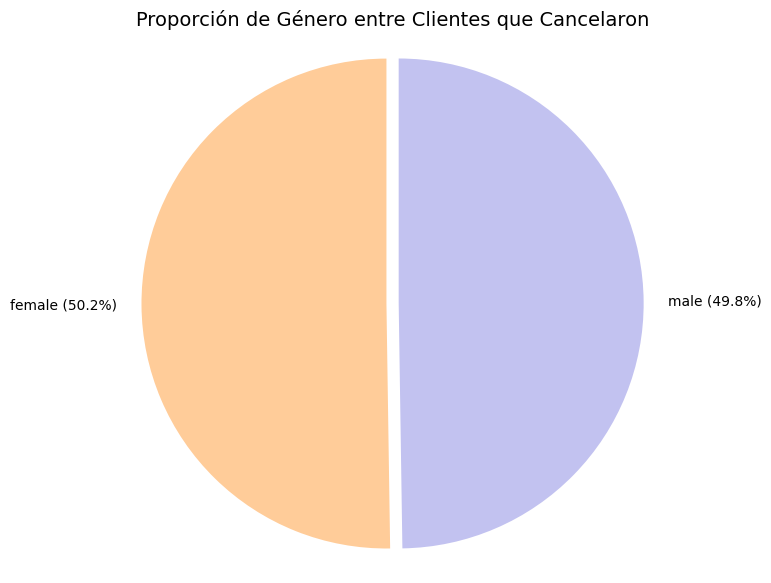

Además, la mayoria que cancela son menores de 65 años, este dato es interesante poraque nos permitirá enfocar estrategias en personas menoresa esa edad.

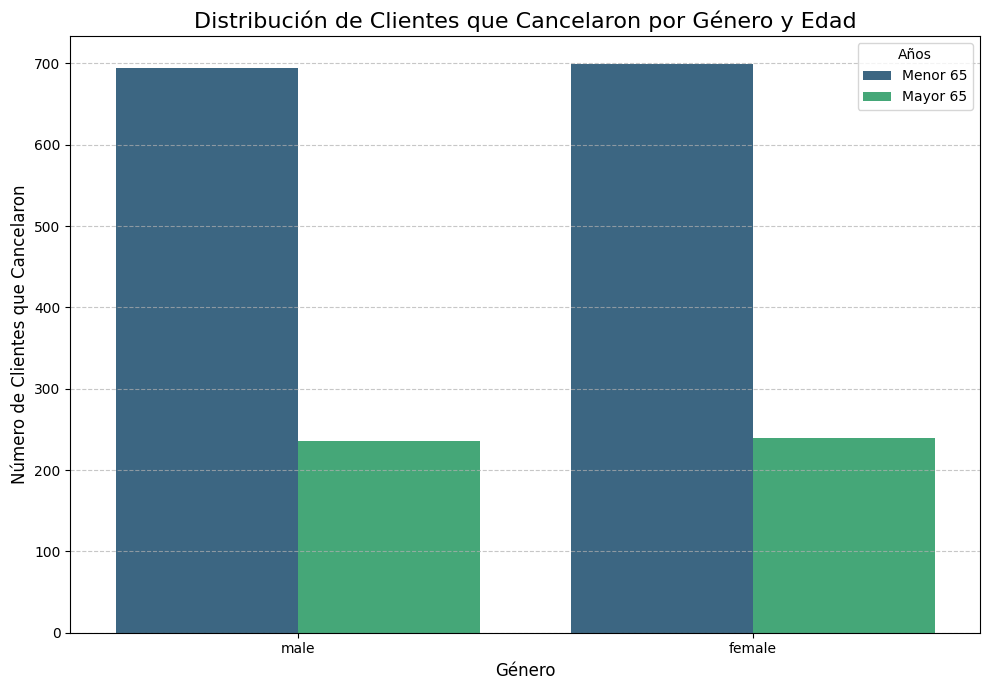

#### **Evasión por Tipo de Contrato y Forma de Pago**

Se exploró la relación entre la cancelación del servicio y el tipo de contrato, así como la forma de pago utilizada por los clientes.

Estos gráficos son cruciales para entender cómo la duración del compromiso y el método de pago influyen en la decisión de evasión. Se espera que los contratos de menor duración (ej. mes a mes) y ciertos métodos de pago (ej. cheque electrónico) muestren una mayor tasa de evasión.

Aquí debemos prestar atención para elaborar estrategias aque permitan fidelizar a los clientes.

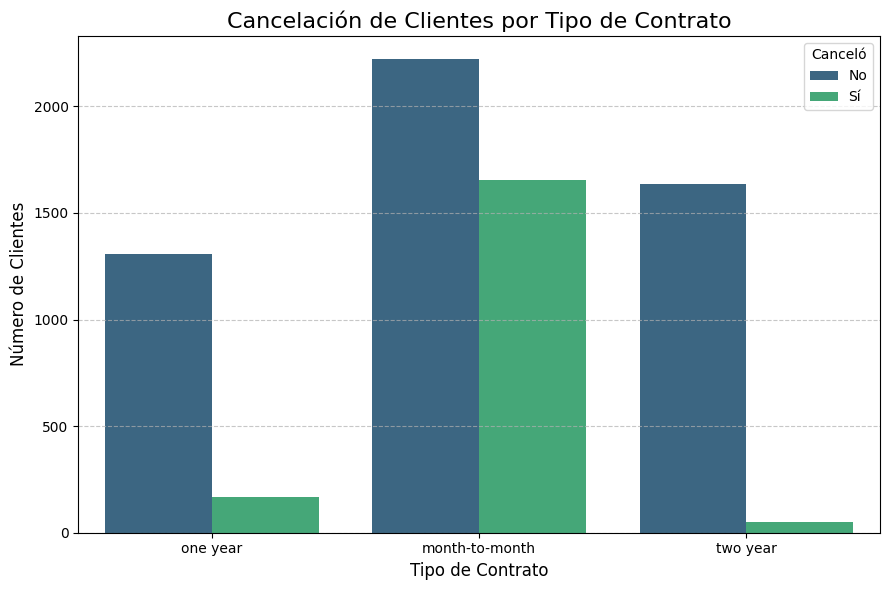

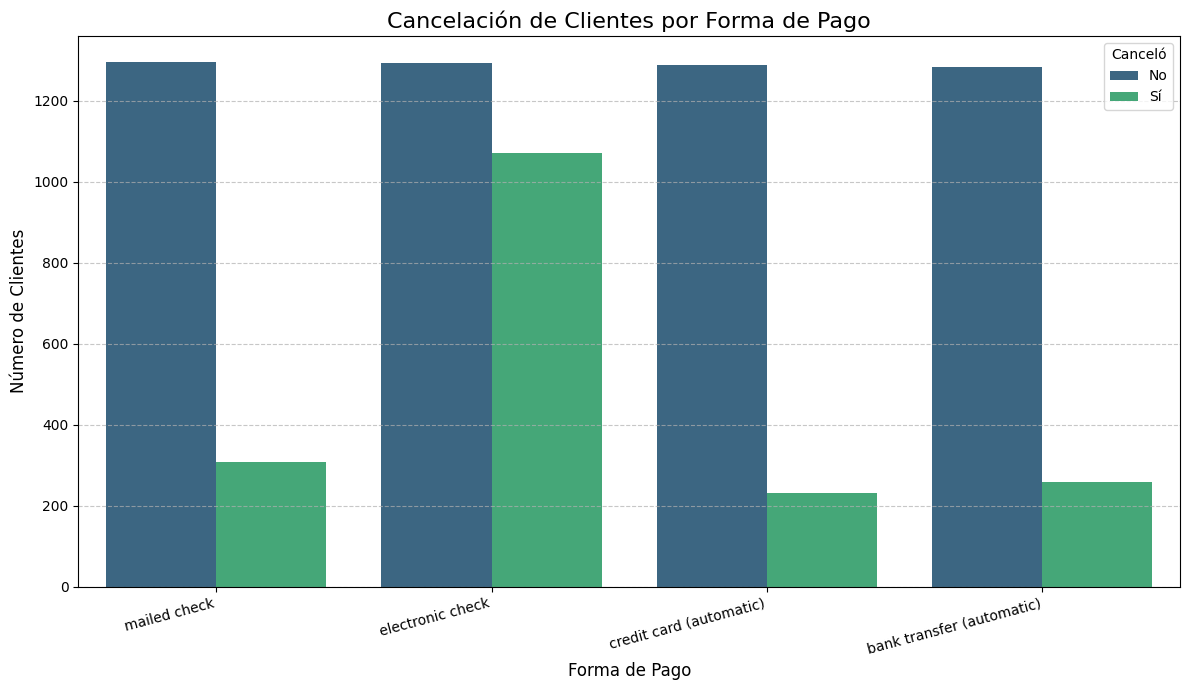

#### **Evasión por Variables Numéricas (cargo_total, cuentas_diarias)**

Se examinó cómo las distribuciones de cargo_total y cuentas_diarias difieren entre los clientes que cancelaron y los que no.

Los clientes con un menor gasto acumulado a lo largo del tiempo tienen una probabilidad significativamente mayor de cancelar su servicio.



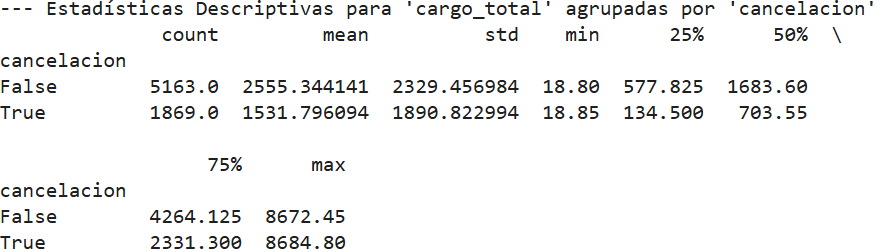

El hallazgo más contundente de esta tabla es que los clientes que cancelan el servicio (True) tienen un cargo total promedio (mean) y mediana (50%) mucho más bajos en comparación con los clientes que permanecen (False).

Vamos a detallar los puntos clave:

    Promedio (Mean):
        Clientes que Permanecen (False): $2555.34
        Clientes que Cancelan (True): $1531.80
        Insight: El cliente promedio que cancela gasta aproximadamente $1000 menos en total que el cliente que permanece.

    Mediana (50%):
        Clientes que Permanecen (False): $1683.60
        Clientes que Cancelan (True): $703.55
        Insight: La mediana de gasto total para los clientes que cancelan es más del doble inferior a la de los clientes que permanecen. Esto sugiere que el 50% de los clientes que cancelan han gastado menos de $703.55 en total, mientras que el 50% de los que permanecen han gastado más de $1683.60. La mediana es una métrica más robusta que la media para datos sesgados como este (donde hay pocos valores muy altos que tiran la media hacia arriba).

    Cuartiles (25% y 75%):
        Observa los cuartiles (25% y 75%) para ambos grupos. El rango completo de la distribución de cargo_total para los clientes que cancelan está notablemente más bajo que para los que permanecen.
        Por ejemplo, el 75% de los clientes que cancelan han gastado menos de $2331.30, mientras que el 75% de los clientes que permanecen han gastado menos de $4264.12. Esto refuerza que los clientes con menor gasto acumulado son más propensos a la evasión.

¡Excelente! Esta tabla es muy reveladora. Aquí te desglosamos los insights clave que puedes sacar de las estadísticas descriptivas de cargo_total agrupadas por cancelacion:
Insight Principal: Los Clientes que Cancelan Tienen un Gasto Total Significativamente Menor

El hallazgo más contundente de esta tabla es que los clientes que cancelan el servicio (True) tienen un cargo total promedio (mean) y mediana (50%) mucho más bajos en comparación con los clientes que permanecen (False).

Vamos a detallar los puntos clave:

    Promedio (Mean):
        Clientes que Permanecen (False): $2555.34
        Clientes que Cancelan (True): $1531.80
        Insight: El cliente promedio que cancela gasta aproximadamente $1000 menos en total que el cliente que permanece.

    Mediana (50%):
        Clientes que Permanecen (False): $1683.60
        Clientes que Cancelan (True): $703.55
        Insight: La mediana de gasto total para los clientes que cancelan es más del doble inferior a la de los clientes que permanecen. Esto sugiere que el 50% de los clientes que cancelan han gastado menos de $703.55 en total, mientras que el 50% de los que permanecen han gastado más de $1683.60. La mediana es una métrica más robusta que la media para datos sesgados como este (donde hay pocos valores muy altos que tiran la media hacia arriba).

    Cuartiles (25% y 75%):
        Observa los cuartiles (25% y 75%) para ambos grupos. El rango completo de la distribución de cargo_total para los clientes que cancelan está notablemente más bajo que para los que permanecen.
        Por ejemplo, el 75% de los clientes que cancelan han gastado menos de $2331.30, mientras que el 75% de los clientes que permanecen han gastado menos de $4264.12. Esto refuerza que los clientes con menor gasto acumulado son más propensos a la evasión.

**Implicaciones del Insight:**

*    **Menor Lealtad o Compromiso**: Un cargo total más bajo a menudo está correlacionado con una menor antigüedad del cliente o con la contratación de menos servicios/paquetes. Es lógico pensar que los clientes que han invertido menos tiempo o dinero en la empresa tienen un menor "costo de cambio" y, por lo tanto, son más propensos a cancelar.

*    **Identificación de Riesgo**: Los clientes con un gasto total acumulado bajo (por debajo de la mediana del grupo que permanece, o incluso por debajo de la mediana del grupo que cancela) representan un segmento de alto riesgo de evasión.


*    **Oportunidad de Intervención**: Puedes enfocar tus esfuerzos de retención en clientes que, por su bajo cargo_total, pueden estar en las primeras etapas de su ciclo de vida con la empresa o aquellos que no están utilizando muchos servicios. Ofrecerles incentivos para que se queden, mejoren su plan o exploren más servicios podría ser una estrategia efectiva.

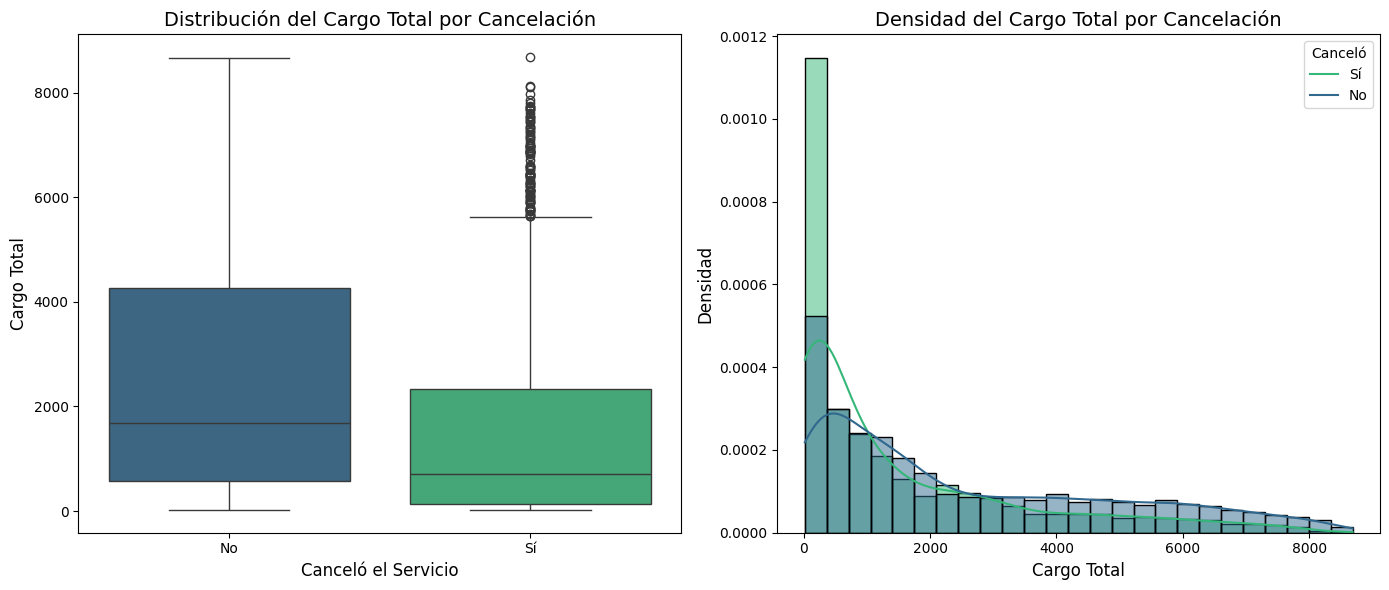

** Clientes que Cancelan Tienen un Mayor Promedio de 'Cuentas Diarias' y Menor Variabilidad**

Aquí desglosamos lo que nos dicen estos números:

    Promedio (Mean):
        Clientes que Permanecen (False): 2.04
        Clientes que Cancelan (True): 2.48
        Insight: Los clientes que cancelan el servicio tienen, en promedio, una mayor cantidad de 'cuentas diarias' (aproximadamente 0.44 más) que aquellos que permanecen.

    Mediana (50%):
        Clientes que Permanecen (False): 2.15
        Clientes que Cancelan (True): 2.66
        Insight: La mediana refuerza la diferencia observada en la media. El 50% de los clientes que cancelan tienen 2.66 o menos 'cuentas diarias', lo cual es notablemente más alto que la mediana de los que permanecen (2.15).

    Desviación Estándar (Std):
        Clientes que Permanecen (False): 1.04
        Clientes que Cancelan (True): 0.82
        Insight: La distribución de 'cuentas diarias' entre los clientes que cancelan es menos dispersa (más homogénea) que la de los clientes que permanecen. Esto sugiere que, si bien el promedio es más alto para los que cancelan, sus valores están más agrupados alrededor de ese promedio.

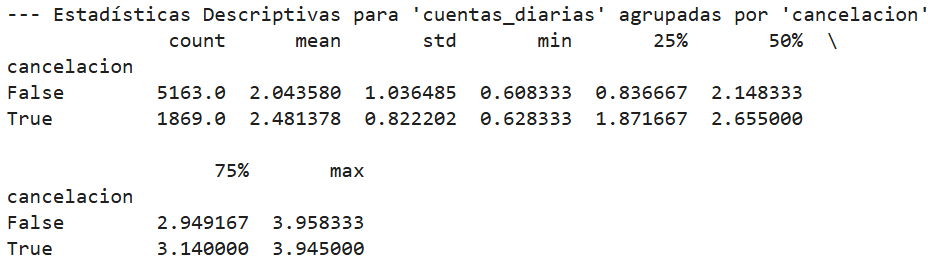

**Implicaciones del Insight:**

*    **Clientes de Mayor Uso/Demanda con Riesgo:** Contrario a la intuición inicial (donde se esperaría que los clientes de bajo uso cancelaran), este hallazgo sugiere que los clientes que utilizan una mayor cantidad de 'cuentas diarias' podrían estar experimentando problemas o insatisfacción que los lleva a la evasión. Podrían ser clientes que demandan más recursos, tienen más problemas técnicos, o esperan un nivel de servicio que no están recibiendo.

*   **Segmento Insatisfecho de Alto Valor/Uso:** Si 'cuentas_diarias' se correlaciona con la intensidad de uso o la complejidad de las necesidades del cliente, aquellos con valores más altos que cancelan podrían ser un segmento de alto valor o alta demanda que no está siendo satisfecho.

*   **Investigación Adicional Necesaria**: Este insight es crucial para una investigación más profunda. Necesitamos entender por qué los clientes con un uso más elevado de 'cuentas diarias' están cancelando. ¿Es porque la calidad del servicio no está a la altura de su uso intensivo? ¿Están encontrando mejores ofertas que les permiten gestionar más cuentas por el mismo o menor precio?

En resumen, los clientes que cancelan el servicio tienden a tener un mayor número de 'cuentas diarias' y sus patrones de uso son más consistentes (menor desviación estándar). Este es un contraintuitivo pero valioso insight que podría señalar áreas específicas de mejora en la calidad del servicio o en la gestión de las expectativas de los clientes de alto uso

### 🔹 **Conclusiones e Insights**

Basado en el análisis exploratorio de datos, se extraen las siguientes conclusiones clave:

*    **Tasa de Evasión General**: es de 26.6%

*    **Impacto de la Edad y Género**: Los clientes hombres menores de 65 años parecen tener una tasa de evasión ligeramente mayor, o, "No se observa una diferencia significativa en la tasa de evasión basada únicamente en el género o la edad avanzada".

*    **Rol del Contrato**: Los contratos de mes a mes son, consistentemente, el tipo de contrato con mayor tendencia a la evasión. Esto es predecible, dado que ofrecen mayor flexibilidad y menor compromiso a largo plazo. Por el contrario, los clientes con contratos de uno o dos años muestran una tasa de evasión significativamente menor.

*    **Influencia del Método de Pago**: Los clientes que utilizan cheque electrónico como método de pago tienen una tasa de evasión considerablemente más alta en comparación con otros métodos como transferencias bancarias o tarjetas de crédito automáticas. Esto podría indicar una menor lealtad o satisfacción, o incluso una correlación con una demografía específica.

*    **Comportamiento de Gasto y Uso**: Los clientes que cancelan el servicio tienden a tener un cargo total acumulado más bajo en comparación con los que permanecen. Esto sugiere que los clientes con un menor gasto o menor antigüedad (dado que cargo_total está relacionado con el tiempo y el gasto mensual) son más propensos a la evasión.

* **Respecto a las cuentas_diarias**: no se observa una diferencia clara en la distribución de cuentas_diarias entre los grupos," o "los clientes con menos cuentas_diarias muestran una mayor propensión a la evasión.

### 🔹 Recomendaciones Estratégicas

Basado en los hallazgos del análisis, se sugieren las siguientes recomendaciones para reducir la evasión de clientes:

1.    **Incentivar Contratos a Largo Plazo:**

*        **Estrategia**: Ofrecer descuentos atractivos o beneficios exclusivos (ej. velocidades de internet mejoradas, canales premium gratuitos por un tiempo) a los clientes que opten por contratos de uno o dos años, en lugar de mes a mes.

*        **Objetivo**: Aumentar el compromiso del cliente y reducir la flexibilidad de la cancelación.

2.   **Optimizar la Experiencia del Cliente con Cheque Electrónico:**

*        **Estrategia**: Investigar la causa de la alta evasión entre clientes que pagan con cheque electrónico. Podría ser un segmento específico de clientes (ej. más sensibles al precio, menos expertos digitalmente). Considerar ofrecer alternativas de pago más cómodas y seguras (ej. domiciliación bancaria con pequeños incentivos) o programas de fidelización específicos para este grupo.

*        **Objetivo**: Mejorar la satisfacción y retención en un segmento de alto riesgo.

3.    **Monitoreo Temprano de Clientes con Bajo Gasto/Antigüedad**:

*        **Estrategia**: Implementar un sistema de alerta temprana para identificar a clientes con bajo cargo_total acumulado y/o poca antigüedad en el servicio. A estos clientes se les podría ofrecer un "check-in" proactivo (llamada, encuesta), promociones personalizadas (ej. un mes de servicio gratuito si renuevan), o mejoras en su paquete para demostrar valor y aumentar el compromiso.

*        **Objetivo**: Intervenir antes de que la insatisfacción culmine en una cancelación.

4.    **Programas de Fidelización Segmentados**:

*        **Estrategia**: Diseñar programas de fidelización que no solo recompensen la lealtad (meses de contrato), sino también el uso de servicios (ej. beneficios por mantener servicios de internet de alta gama o por el uso de cuentas_diarias).

*        **Objetivo**: Aumentar el valor percibido y la retención en segmentos específicos.

5.    **Análisis Adicional de Causas de Evasión**:

*        **Estrategia**: Complementar este análisis cuantitativo con investigación cualitativa (ej. encuestas de salida a clientes que cancelan, grupos focales) para entender las razones subjetivas detrás de la evasión.

*        **Objetivo**: Obtener una comprensión más profunda de los "porqués" y validar los patrones observados en los datos.

### **¡Extra! Análisis de correlación entre variables**

<ipython-input-47-e91ff5437945>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_telecom, x='cancelacion', y='cuentas_diarias', palette='pastel')


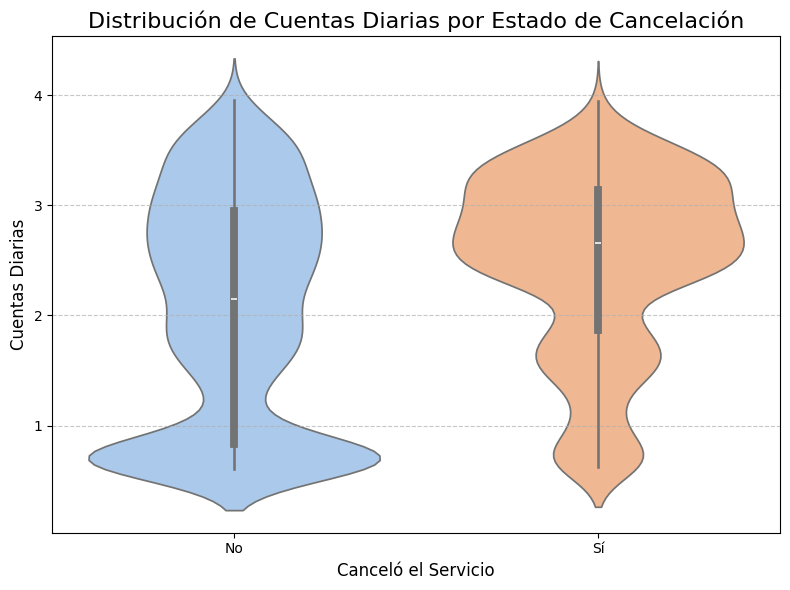


Correlación entre 'cancelacion' y 'cuentas_diarias': 0.193


In [47]:
df_telecom['cancelacion'] = df_telecom['cancelacion'].astype(bool)
df_telecom['cuentas_diarias'] = pd.to_numeric(df_telecom['cuentas_diarias'], errors='coerce')
df_telecom.dropna(subset=['cuentas_diarias', 'cancelacion'], inplace=True)

#Gráfico: Violin Plot de 'cuentas_diarias' vs. 'cancelacion' ---
# Este gráfico es excelente porque muestra la densidad de los datos además de la mediana y los cuartiles.
plt.figure(figsize=(8, 6))
sns.violinplot(data=df_telecom, x='cancelacion', y='cuentas_diarias', palette='pastel')
plt.title('Distribución de Cuentas Diarias por Estado de Cancelación', fontsize=16)
plt.xlabel('Canceló el Servicio', fontsize=12)
plt.ylabel('Cuentas Diarias', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Correlación numérica entre 'cuentas_diarias' y 'cancelacion' ---
# Pandas convierte True/False a 1/0 para calcular la correlación
correlation_cuentas_diarias = df_telecom['cancelacion'].corr(df_telecom['cuentas_diarias'])
print(f"\nCorrelación entre 'cancelacion' y 'cuentas_diarias': {correlation_cuentas_diarias:.3f}")


*    Los clientes que tienen un mayor número de `'cuentas diarias'` tienden a ser más propensos a cancelar e|l servicio.

Este resultado refuerza lo que ya insinuaban las estadísticas descriptivas: el grupo de clientes que cancela tiene un promedio de `cuentas_diarias` más alto. La correlación nos da una medida numérica de esta tendencia.

Es importante recordar que la correlación no implica causalidad. Es decir, que una mayor cantidad de 'cuentas diarias' no causa directamente la evasión, sino que ambas variables tienden a moverse en la misma dirección. Hay otros factores que podrían estar influyendo en esta relación.

In [48]:
# hacemos un lazo for para recorrer los datos
for col in df_telecom.columns:
  valores_unicos = df_telecom[col].unique()
  print(f"Columna '{col}': {valores_unicos}")


Columna 'id': ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Columna 'cancelacion': [False  True]
Columna 'genero': ['female' 'male']
Columna 'mayor_65': [False  True]
Columna 'pareja': [ True False]
Columna 'dependientes': [ True False]
Columna 'meses_contrato': [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Columna 'servicio_telefonico': [ True False]
Columna 'multiples_lineas': [False  True]
Columna 'proveedor_internet': ['dsl' 'fiber optic' 'no']
Columna 'seguridad_online': [False  True]
Columna 'respaldo_online': [ True False]
Columna 'proteccion_dispositivo': [False  True]
Columna 'soporte_tecnico': [ True False]
Columna 'tv_cable': [ True False]
Columna 'peliculas_streaming': [False  True]
Columna 'tipo_contrato': ['one year' 'month-to-month' 'two year']
Columna 'factura_

In [51]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   cancelacion             7032 non-null   bool   
 2   genero                  7032 non-null   object 
 3   mayor_65                7032 non-null   bool   
 4   pareja                  7032 non-null   bool   
 5   dependientes            7032 non-null   bool   
 6   meses_contrato          7032 non-null   int64  
 7   servicio_telefonico     7032 non-null   bool   
 8   multiples_lineas        7032 non-null   bool   
 9   proveedor_internet      7032 non-null   object 
 10  seguridad_online        7032 non-null   bool   
 11  respaldo_online         7032 non-null   bool   
 12  proteccion_dispositivo  7032 non-null   bool   
 13  soporte_tecnico         7032 non-null   bool   
 14  tv_cable                7032 non-null   bool 

In [52]:
# Lista de columnas que representan servicios adicionales (AJÚSTALA SI ES NECESARIO)
# Excluye 'PhoneService' si quieres contar solo servicios adicionales de internet
service_columns = [
    'servicio_telefonico', 'multiples_lineas', 'seguridad_online',
    'respaldo_online', 'proteccion_dispositivo', 'soporte_tecnico', 'tv_cable',
    'peliculas_streaming'
]

# Calcular el número total de servicios contratados
# Sumamos las columnas booleanas (True se cuenta como 1, False como 0)
df_telecom['num_servicios'] = df_telecom[service_columns].sum(axis=1)

print("Primeros registros con la nueva columna 'num_servicios':")
print(df_telecom[['num_servicios', 'cancelacion']].head())

Primeros registros con la nueva columna 'num_servicios':
   num_servicios  cancelacion
0              4        False
1              3        False
2              2         True
3              5         True
4              3         True


<ipython-input-54-8f0cf9e53038>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_telecom, x='cancelacion', y='num_servicios', palette='pastel')


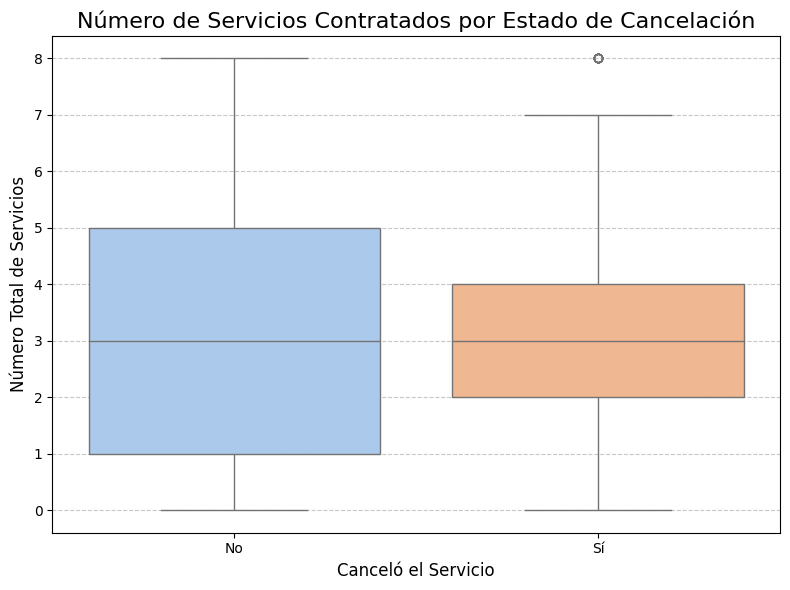


Correlación entre 'cancelacion' y 'Número de Servicios': -0.067

--- Estadísticas Descriptivas para 'num_servicios' agrupadas por 'cancelacion' ---
              count      mean       std  min  25%  50%  75%  max
cancelacion                                                     
False        5163.0  3.447027  2.156609  0.0  1.0  3.0  5.0  8.0
True         1869.0  3.132156  1.754828  0.0  2.0  3.0  4.0  8.0


In [54]:
# Gráfico: Box Plot del Número de Servicios vs. Cancelación ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_telecom, x='cancelacion', y='num_servicios', palette='pastel')

plt.title('Número de Servicios Contratados por Estado de Cancelación', fontsize=16)
plt.xlabel('Canceló el Servicio', fontsize=12)
plt.ylabel('Número Total de Servicios', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí']) # Etiquetas descriptivas para el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Correlación numérica entre 'num_servicios' y 'cancelacion' ---
correlation_num_servicios = df_telecom['cancelacion'].corr(df_telecom['num_servicios'])
print(f"\nCorrelación entre 'cancelacion' y 'Número de Servicios': {correlation_num_servicios:.3f}")

# --- Estadísticas Descriptivas para 'num_servicios' agrupadas por 'cancelacion' ---
print("\n--- Estadísticas Descriptivas para 'num_servicios' agrupadas por 'cancelacion' ---")
print(df_telecom.groupby('cancelacion')['num_servicios'].describe())

**Los Clientes con Menos Servicios Contratados Son Ligeramente Más Propensos a Cancelar**

***Correlación entre 'cancelacion' y 'Número de Servicios': -0.067***

*    **Signo Negativo**: El signo negativo (-) indica que hay una relación inversa (negativa). Esto significa que a medida que el número de servicios contratados disminuye, la probabilidad de que un cliente cancele el servicio tiende a aumentar.

*    **Valor Débil**: El valor 0.067 (en valor absoluto) es muy pequeño, lo que sugiere una correlación lineal muy débil. Esto significa que, aunque la tendencia existe, el número de servicios por sí solo no es un predictor extremadamente fuerte de la evasión. Otros factores probablemente tienen una influencia mucho mayor.

***Estadísticas Descriptivas para 'num_servicios' agrupadas por 'cancelacion':***

**Promedio (Mean):**

*    Clientes que Permanecen (False): 3.45 servicios.

*    Clientes que Cancelan (True): 3.13 servicios.

*    Insight: El cliente promedio que cancela tiene un número ligeramente menor de servicios contratados que el cliente que permanece (aproximadamente 0.32 servicios menos).

**Mediana (50%):**

*    Clientes que Permanecen (False): 3.0 servicios.

*    Clientes que Cancelan (True): 3.0 servicios.

*    Insight: La mediana es la misma para ambos grupos (3.0 servicios). Esto nos dice que el punto medio de la distribución de servicios es el mismo para ambos grupos, lo que refuerza la idea de una correlación débil. La diferencia se ve más en el promedio debido a la distribución.

**Desviación Estándar (Std):**

*    Clientes que Permanecen (False): 2.16

*    Clientes que Cancelan (True): 1.75

*    Insight: La distribución de servicios entre los clientes que cancelan es ligeramente menos dispersa (más homogénea) que la de los clientes que permanecen. Esto sugiere que, si bien el promedio es ligeramente más bajo para los que cancelan, sus valores están más agrupados.

**Implicaciones:**

*    **Menor "Adherencia" al Servicio:** Los clientes que contratan menos servicios pueden sentirse menos "atados" o invertidos en la compañía. Si un cliente solo tiene un servicio básico, el esfuerzo de cambiar de proveedor es menor que si tuviera múltiples servicios interconectados.

*    **Valor Percibido**: Podría ser que los clientes con menos servicios no perciban suficiente valor en lo que están pagando, o que encuentren ofertas más competitivas para esos servicios básicos en otro lugar.

*    **Oportunidad de Venta Cruzada/Up-selling**: Este hallazgo sugiere una oportunidad para enfocar los esfuerzos de retención en clientes con un número bajo de servicios, incentivándolos a contratar más. Cuantos más servicios tengan, más "pegajosos" podrían volverse.

En resumen, aunque el número de servicios contratados tiene una correlación negativa muy débil con la evasión, los datos sugieren una tendencia: los clientes que optan por menos servicios tienen una probabilidad marginalmente mayor de cancelar. Este es un factor a considerar al identificar clientes en riesgo.